Visualization using PCA and t-SNE

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # for t-SNE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import scipy.cluster.hierarchy
from sklearn.mixture import GaussianMixture
from imageio import imread
import os
os.chdir('/Users/snehgurdasani/Documents/Documents/DS5230-Unsupervised Learning/Homeworks/H5-Clusterinf/imageFiles')

In [8]:
def parse_image_and_normalize_vectors(image):
    img = imread(image)
    list_of_vectors = []
    for ij in np.ndindex(img.shape[:2]):
        feature_vector = [ij[0],ij[1],img[ij][0],img[ij][1],img[ij][2]]
        list_of_vectors.append(feature_vector)
    img_df = pd.DataFrame(list_of_vectors)
    img_df.columns = ["row","col","r","g","b"]
    
    # normalize feature vectors
    x = img_df.values
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    df.columns = ["row","col","r","g","b"]    
    return df

In [13]:
# Two images
dfMatrixPlane = parse_image_and_normalize_vectors('3096_colorPlane.jpg')
dfMatrixBird = parse_image_and_normalize_vectors('42049_colorBird.jpg')

In [14]:
dfMatrixPlane

,row,col,r,g,b
0,0.0,0.000000,0.750000,0.754098,0.826816
1,0.0,0.002083,0.750000,0.754098,0.826816
2,0.0,0.004167,0.750000,0.754098,0.826816
3,0.0,0.006250,0.744565,0.748634,0.821229
4,0.0,0.008333,0.744565,0.748634,0.821229
5,0.0,0.010417,0.744565,0.748634,0.821229
6,0.0,0.012500,0.739130,0.743169,0.815642
7,0.0,0.014583,0.739130,0.743169,0.815642
8,0.0,0.016667,0.750000,0.754098,0.826816
9,0.0,0.018750,0.750000,0.754098,0.826816


In [15]:
dfMatrixBird

,row,col,r,g,b
0,0.0,0.000000,0.241803,0.345238,0.445783
1,0.0,0.002083,0.245902,0.349206,0.449799
2,0.0,0.004167,0.250000,0.353175,0.453815
3,0.0,0.006250,0.258197,0.361111,0.461847
4,0.0,0.008333,0.266393,0.369048,0.469880
5,0.0,0.010417,0.274590,0.376984,0.469880
6,0.0,0.012500,0.278689,0.380952,0.473896
7,0.0,0.014583,0.282787,0.384921,0.477912
8,0.0,0.016667,0.290984,0.392857,0.485944
9,0.0,0.018750,0.290984,0.392857,0.481928


In [16]:
# PCA on the data

In [25]:
# PCA on image 1
def pca_function(img,n_components,title):
    pca = PCA(n_components = n_components)
    principal_components = pca.fit_transform(img)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.title(title)
    plt.show()
    return principal_components

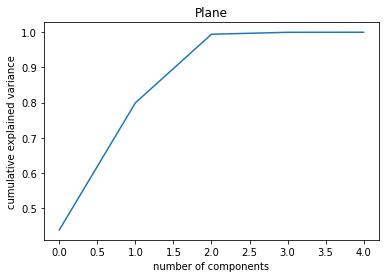

In [26]:
#Plane image explained variance
pca_plane_5 = pca_function(dfMatrixPlane,5,'Plane')

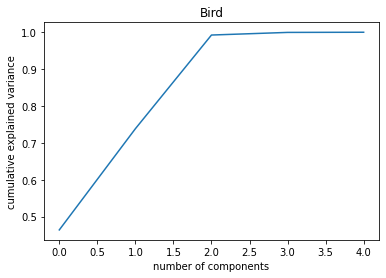

In [27]:
# Bird image explained variance
pca_bird_5 = pca_function(dfMatrixBird,5,'Bird')

The explained variance for both the images maximizes at 3 components.

In [31]:
# Scatter plot for 3 components.
pca = PCA(n_components= 3)
pca_fit_plane = pca.fit_transform(dfMatrixPlane) 
pca_fit_bird = pca.fit_transform(dfMatrixBird)

In [35]:
pca_fit_plane_df = pd.DataFrame(data = pca_fit_plane, columns = ['PCA1','PCA2','PCA3'])

In [36]:
pca_fit_bird_df = pd.DataFrame(data = pca_fit_bird, columns = ['PCA1','PCA2','PCA3'])

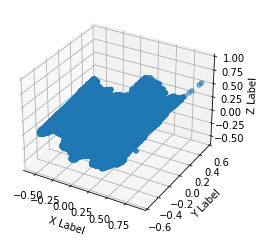

In [38]:
# Check it out later.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_fit_plane_df['PCA1'], pca_fit_plane_df['PCA2'], pca_fit_plane_df['PCA3'], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

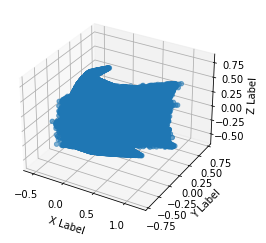

In [39]:
# Check it out later.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_fit_bird_df['PCA1'], pca_fit_bird_df['PCA2'], pca_fit_bird_df['PCA3'], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Reconstructing images to see the variance explained by 3 components.

In [52]:
def image_decompression(df):
    pca1 = PCA(n_components= 3)
    pca_fit = pca1.fit(df)
    pca_img_compressed = pca_fit.transform(df)
    img_decompressed = pca_fit.inverse_transform(pca_img_compressed)
    fig, ax = plt.subplots(1,1, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    ax.imshow(img_decompressed[:,2:5].reshape(321,481,3))
    ax.set_xlabel('Reconstruction from All Components')
    ax.title.set_text('PCA Reconstructed Image of Bird') 
    plt.show()
    fig,ax1= plt.subplots(1,3,figsize = (13,13))
    for i in range(1,4):
        ax1[i-1].imshow(pca_img_compressed[:,i-1].reshape(321,481)) 
        ax1[i-1].set_xlabel('Reconstruction on Principal Component{}'.format(i))
        ax1[i-1].title.set_text('Compressed Bird Image')  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


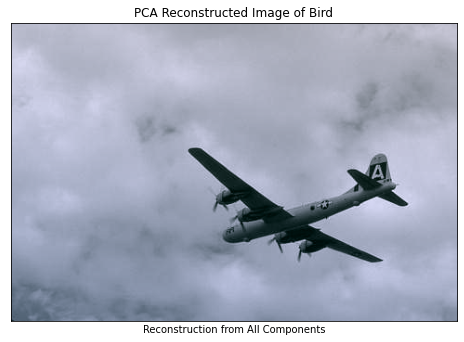

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


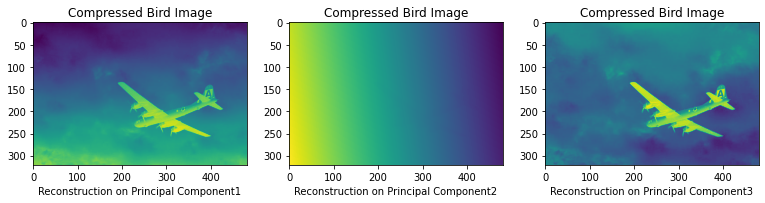

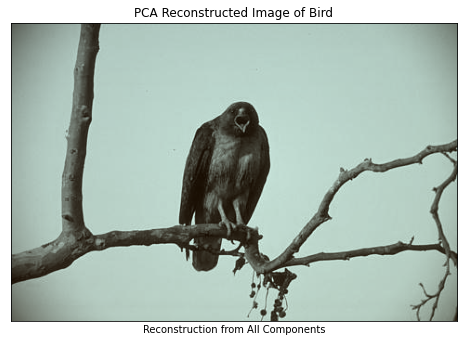

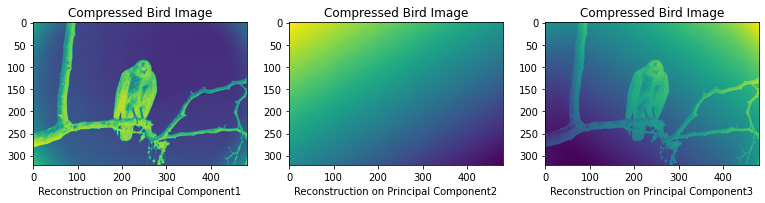

In [53]:
image_decompression(dfMatrixPlane)
image_decompression(dfMatrixBird)

In [55]:
# Apply t-SNE on plane without subsampling
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300) 
tsne_plane_2d = tsne.fit_transform(dfMatrixPlane)
tsne_matrix_plane_2d= pd.DataFrame(data={'pc1':tsne_plane_2d[:,0],'pc2': tsne_plane_2d[:,1]})

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 154401 samples in 0.168s...
[t-SNE] Computed neighbors for 154401 samples in 3.495s...
[t-SNE] Computed conditional probabilities for sample 1000 / 154401
[t-SNE] Computed conditional probabilities for sample 2000 / 154401
[t-SNE] Computed conditional probabilities for sample 3000 / 154401
[t-SNE] Computed conditional probabilities for sample 4000 / 154401
[t-SNE] Computed conditional probabilities for sample 5000 / 154401
[t-SNE] Computed conditional probabilities for sample 6000 / 154401
[t-SNE] Computed conditional probabilities for sample 7000 / 154401
[t-SNE] Computed conditional probabilities for sample 8000 / 154401
[t-SNE] Computed conditional probabilities for sample 9000 / 154401
[t-SNE] Computed conditional probabilities for sample 10000 / 154401
[t-SNE] Computed conditional probabilities for sample 11000 / 154401
[t-SNE] Computed conditional probabilities for sample 12000 / 154401
[t-SNE] Computed conditional probabi

[t-SNE] Computed conditional probabilities for sample 119000 / 154401
[t-SNE] Computed conditional probabilities for sample 120000 / 154401
[t-SNE] Computed conditional probabilities for sample 121000 / 154401
[t-SNE] Computed conditional probabilities for sample 122000 / 154401
[t-SNE] Computed conditional probabilities for sample 123000 / 154401
[t-SNE] Computed conditional probabilities for sample 124000 / 154401
[t-SNE] Computed conditional probabilities for sample 125000 / 154401
[t-SNE] Computed conditional probabilities for sample 126000 / 154401
[t-SNE] Computed conditional probabilities for sample 127000 / 154401
[t-SNE] Computed conditional probabilities for sample 128000 / 154401
[t-SNE] Computed conditional probabilities for sample 129000 / 154401
[t-SNE] Computed conditional probabilities for sample 130000 / 154401
[t-SNE] Computed conditional probabilities for sample 131000 / 154401
[t-SNE] Computed conditional probabilities for sample 132000 / 154401
[t-SNE] Computed con

In [54]:
# Apply t-SNE on bird without subsampling. Perplexity : 30
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300) 
tsne_bird_2d = tsne.fit_transform(dfMatrixBird)
tsne_matrix_bird_2d= pd.DataFrame(data={'pc1':tsne_bird_2d[:,0],'pc2': tsne_bird_2d[:,1]})

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 154401 samples in 0.158s...
[t-SNE] Computed neighbors for 154401 samples in 4.280s...
[t-SNE] Computed conditional probabilities for sample 1000 / 154401
[t-SNE] Computed conditional probabilities for sample 2000 / 154401
[t-SNE] Computed conditional probabilities for sample 3000 / 154401
[t-SNE] Computed conditional probabilities for sample 4000 / 154401
[t-SNE] Computed conditional probabilities for sample 5000 / 154401
[t-SNE] Computed conditional probabilities for sample 6000 / 154401
[t-SNE] Computed conditional probabilities for sample 7000 / 154401
[t-SNE] Computed conditional probabilities for sample 8000 / 154401
[t-SNE] Computed conditional probabilities for sample 9000 / 154401
[t-SNE] Computed conditional probabilities for sample 10000 / 154401
[t-SNE] Computed conditional probabilities for sample 11000 / 154401
[t-SNE] Computed conditional probabilities for sample 12000 / 154401
[t-SNE] Computed conditional probabi

[t-SNE] Computed conditional probabilities for sample 125000 / 154401
[t-SNE] Computed conditional probabilities for sample 126000 / 154401
[t-SNE] Computed conditional probabilities for sample 127000 / 154401
[t-SNE] Computed conditional probabilities for sample 128000 / 154401
[t-SNE] Computed conditional probabilities for sample 129000 / 154401
[t-SNE] Computed conditional probabilities for sample 130000 / 154401
[t-SNE] Computed conditional probabilities for sample 131000 / 154401
[t-SNE] Computed conditional probabilities for sample 132000 / 154401
[t-SNE] Computed conditional probabilities for sample 133000 / 154401
[t-SNE] Computed conditional probabilities for sample 134000 / 154401
[t-SNE] Computed conditional probabilities for sample 135000 / 154401
[t-SNE] Computed conditional probabilities for sample 136000 / 154401
[t-SNE] Computed conditional probabilities for sample 137000 / 154401
[t-SNE] Computed conditional probabilities for sample 138000 / 154401
[t-SNE] Computed con

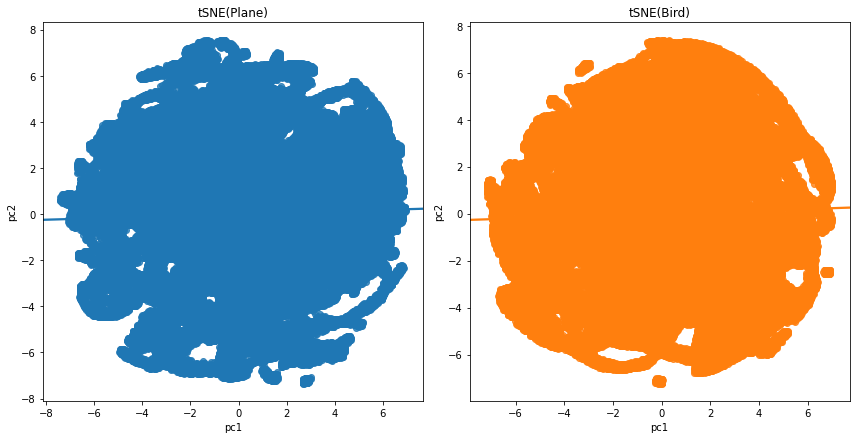

In [56]:
#plotting the tSNE plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_plane_2d,x_jitter=0.1,y_jitter=0.1,ax=ax1)
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_bird_2d,x_jitter=0.1,y_jitter=0.1,ax=ax2)
fig.tight_layout() 
ax1.title.set_text('tSNE(Plane)') 
ax2.title.set_text('tSNE(Bird)')

We obtain a overfilled scatter plot and we can't interpret anything out of it.

Trial 2: Applying t-SNE with subsampling with 5000 data points with normalized features. Perplexity = 35

In [58]:
normalized_sample_plane = dfMatrixPlane.sample(5000) 
normalized_sample_bird = dfMatrixBird.sample(5000)

In [59]:
# fitting the model
tsne_rsample = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=2000) # fitting the plane data
tsne_plane_2d_rsample = tsne_rsample.fit_transform(normalized_sample_plane)
tsne_bird_2d_rsample = tsne_rsample.fit_transform(normalized_sample_bird)

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.003s...
[t-SNE] Computed neighbors for 5000 samples in 0.133s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.040435
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.849453
[t-SNE] KL divergence after 2000 iterations: 0.558592
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...
[t-SNE] Computed neighbors for 5000 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditiona

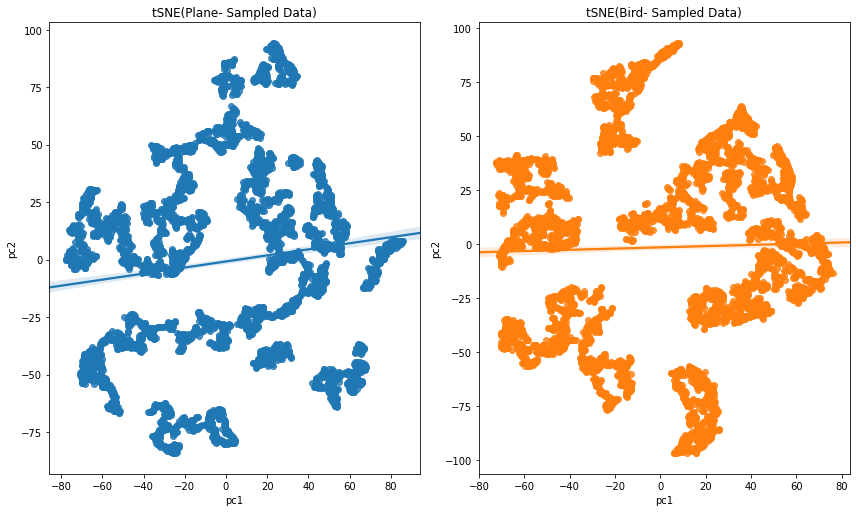

In [63]:
#For the plane figure
tsne_matrix_plane_2d_df = pd.DataFrame(data={'pc1':tsne_plane_2d_rsample[:,0],'pc2':tsne_plane_2d_rsample[:,1]})
# For the bird figure
tsne_matrix_bird_2d_df = pd.DataFrame(data={'pc1':tsne_bird_2d_rsample[:,0],'pc2':tsne_bird_2d_rsample[:,1]})
# For the plane figure
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_plane_2d_df,x_jitter=0.1,y_jitter=0.1,ax=ax1)
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_bird_2d_df,x_jitter=0.1,y_jitter=0.1,ax=ax2)
fig.tight_layout() 
ax1.title.set_text('tSNE(Plane- Sampled Data)') 
ax2.title.set_text('tSNE(Bird- Sampled Data)')

Trial 3: Applying t-SNE with subsampling with 5000 data points with normalized features. Perplexity = 40

In [66]:
# fitting the model
tsne_rsample = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000) # fitting the plane data
tsne_plane_2d_rsample = tsne_rsample.fit_transform(normalized_sample_plane)
tsne_bird_2d_rsample = tsne_rsample.fit_transform(normalized_sample_bird)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...
[t-SNE] Computed neighbors for 5000 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.043173
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.891457
[t-SNE] KL divergence after 2000 iterations: 0.537760
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...
[t-SNE] Computed neighbors for 5000 samples in 0.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditiona

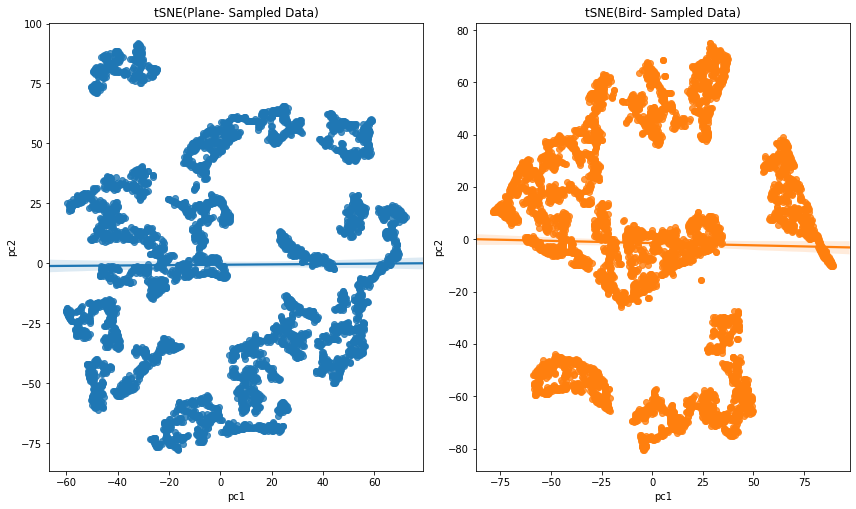

In [67]:
#For the plane figure
tsne_matrix_plane_2d_rs= pd.DataFrame(data={'pc1':tsne_plane_2d_rsample[:,0],'pc2':tsne_plane_2d_rsample[:,1]})
# For the bird figure
tsne_matrix_bird_2d_rs = pd.DataFrame(data={'pc1':tsne_bird_2d_rsample[:,0],'pc2':tsne_bird_2d_rsample[:,1]})
# For the plane figure
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_plane_2d_rs,x_jitter=0.1,y_jitter=0.1,ax=ax1)
sns.regplot(x="pc1", y="pc2",data=tsne_matrix_bird_2d_rs,x_jitter=0.1,y_jitter=0.1,ax=ax2)
fig.tight_layout() 
ax1.title.set_text('tSNE(Plane- Sampled Data)') 
ax2.title.set_text('tSNE(Bird- Sampled Data)')

Observations:
Intuition behind perplexity is how many neighbors each data point can “sense” that is how many data points are close to a single data point. Thus, for dense datasets we require high perplexity values.

KMeans, GMM and Heirarchical Clustering

Getting the optimal K values using ELBOW Method

In [72]:
def optimal_k_val(data,name): 
    loss = []
    k = list(range(2, 15)) 
    for noc in k:
        model = KMeans(n_clusters = noc) 
        model.fit(data) 
        loss.append(model.inertia_)
    plt.plot(k, loss, "-o")
    plt.title("{} Image:Elbow method to decide k".format(name)) 
    plt.xlabel("K")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

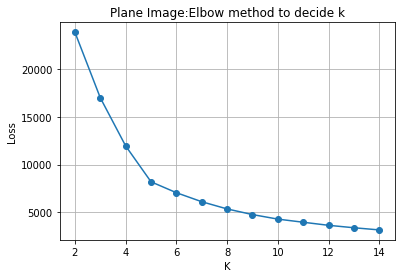

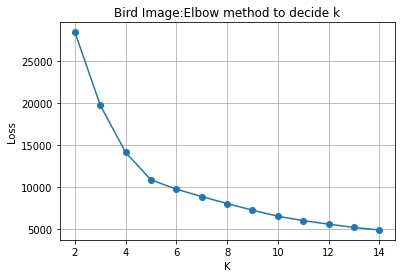

In [73]:
optimal_k_val(dfMatrixPlane, 'Plane')
optimal_k_val(dfMatrixBird, 'Bird')

The optimal value of k for each of the images is 5 as we can see the knee at k=5 in both plots.

In [77]:
def s_c_scores(df):
    sc  = []
    ch = []
    for k in range(2,6):
        model = KMeans(n_clusters = k)
        labels = model.fit(df).labels_
        sc.append(silhouette_score(df, labels))
        ch.append(calinski_harabasz_score(df,labels))
    return (sc,ch)

In [78]:
silhouette_plane,ch_score_plane = s_c_scores(dfMatrixPlane)

In [79]:
silhouette_bird,ch_score_bird = s_c_scores(dfMatrixBird)

In [91]:
silhouette_plane

[0.33935664372793445,
 0.3454741607686818,
 0.3888873646694776,
 0.4107603871419204]

In [90]:
ch_score_plane

[77051.81639186136, 85238.47914735686, 102534.5687120762, 129829.3734057855]

In [89]:
silhouette_bird

[101966.11987804485, 107332.8555313256, 120412.68545156164, 128906.14973502781]

In [92]:
ch_score_bird

[101966.11987804485, 107332.8555313256, 120412.68545156164, 128906.14973502781]

Silhouette analysis is used to measure the separation distance between the resulting clusters. Higher the separation distance between the clusters, better is the clustering.
According to Silhouette score, 5 is the optimal number of clusters for the plane image.

Calinski_harabasz_score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. The score is higher when clusters are dense and well separated.According to Calinski-Harabasz score, 5 is the optimal number of cluters for the plane image.

In [134]:
def segmentation_plots(data,n_cluster):
    # Applying Kmeans on the image.
    kmeans_clusters = KMeans(n_clusters=n_cluster).fit(data)
    labels = kmeans_clusters.predict(data) 
    plt.scatter(data.iloc[:,1],data.iloc[:,0],c=labels) 
    plt.gca().invert_yaxis()
    plt.title('(CLUSTERS = {})'.format(n_cluster))
    plt.show()
    
    # Applying PCA on the image.
    pca_model = PCA(n_components = 3)
    pc_features = pca_model.fit_transform(data)
    pca_fit= pd.DataFrame(data= {'pc1': pc_features[:,0],'pc2':pc_features[:,1],'pc3':pc_features[:,1]})
    
    # Plotting the PCA
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_fit['pc1'], pca_fit['pc2'], pca_fit['pc3'],c = labels, marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    # TSNE STARTS HERE, Subsampling the dataset for faster running.
    data = data.sample(5000)
    kmeans = KMeans(n_clusters=n_cluster).fit(data)
    labels = kmeans.predict(data)
    model = TSNE(n_components = 2,random_state = 0, perplexity=40.0)
    t_data = model.fit_transform(data)
    df=pd.DataFrame()
    df['tsne1'] = t_data[:,0]
    df['tsne2'] = t_data[:,1] 
    plt.scatter(df['tsne1'],df['tsne2'],c=labels)
    plt.title('(TSNE: Cluster = {})'.format(n_cluster))
    plt.show()

PlaneImage 

Number of Plane Clusters :  2


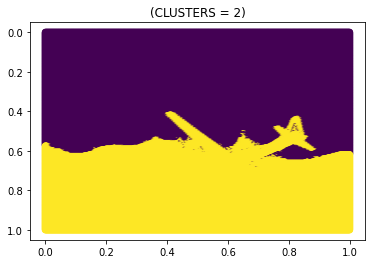

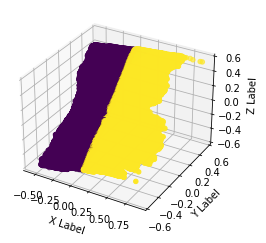

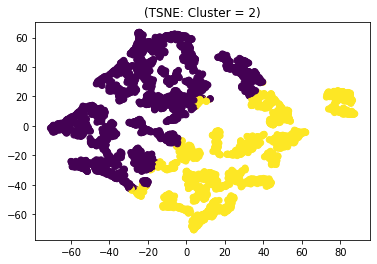

PlaneImage 

Number of Plane Clusters :  3


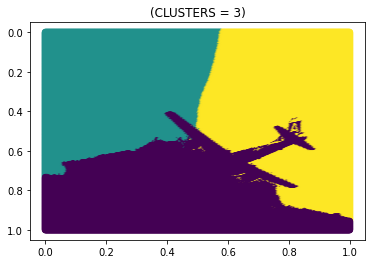

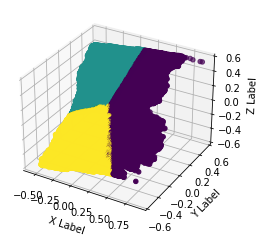

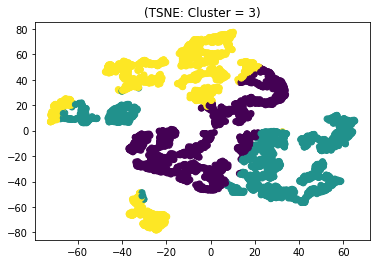

PlaneImage 

Number of Plane Clusters :  4


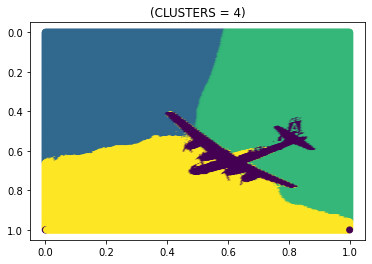

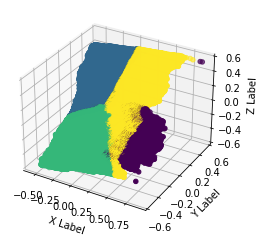

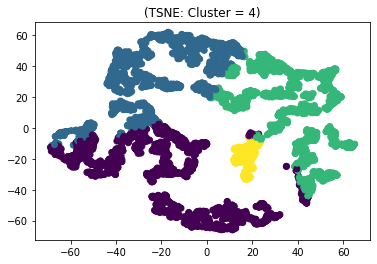

PlaneImage 

Number of Plane Clusters :  5


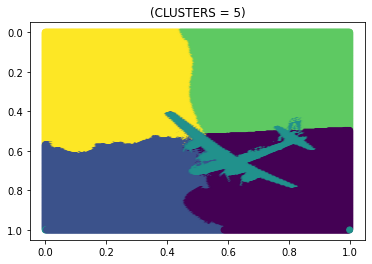

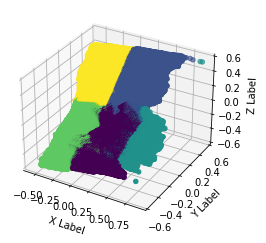

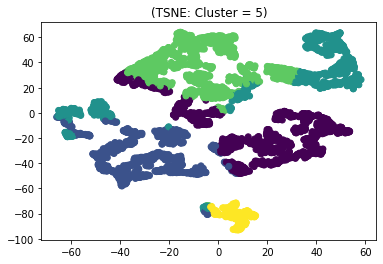

In [135]:
for i in range(2,6):
    print('PlaneImage \n')
    print('Number of Plane Clusters : ',i)
    segmentation_plots(dfMatrixPlane,i)

Bird Image

Number of Bird Clusters :  2


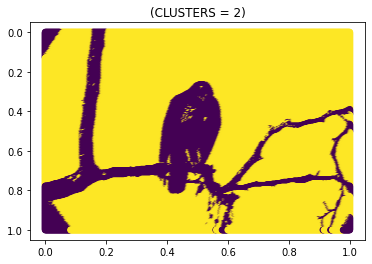

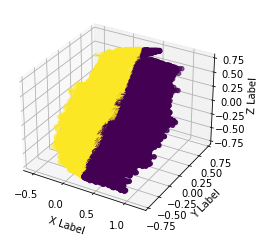

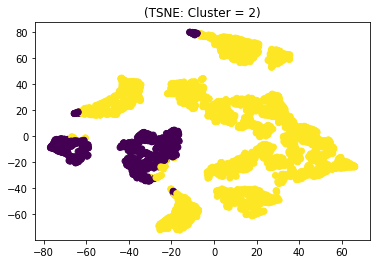

Bird Image

Number of Bird Clusters :  3


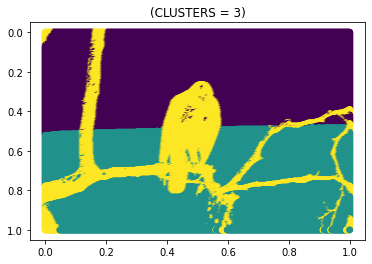

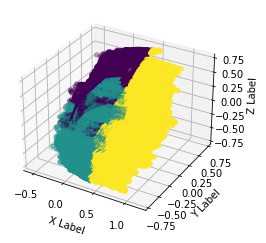

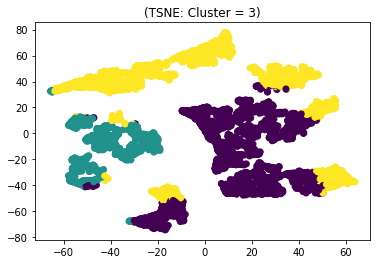

Bird Image

Number of Bird Clusters :  4


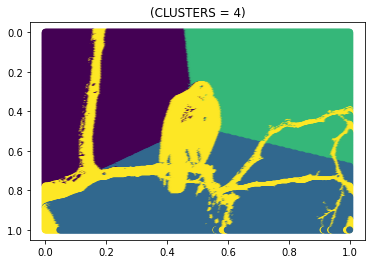

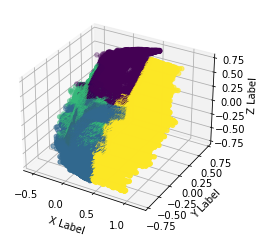

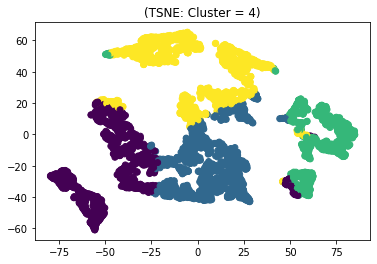

Bird Image

Number of Bird Clusters :  5


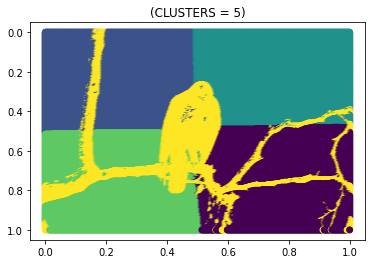

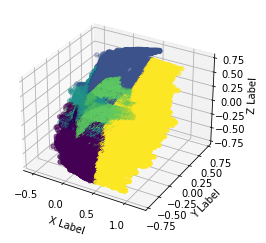

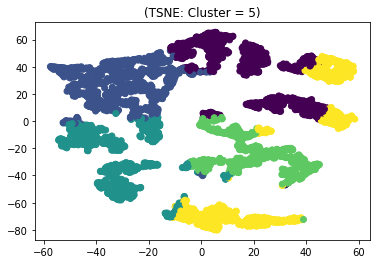

In [136]:
for i in range(2,6):
    print('Bird Image\n')
    print('Number of Bird Clusters : ',i)
    segmentation_plots(dfMatrixBird,i)

GMM model

In [118]:
def score_gmm_func(g_data,kmax): 
    silh = []
    cv = []
    for k in range(2, kmax+1):
        gmm_model = GaussianMixture(n_components=k, covariance_type='spherical')
        model_fit = gmm_model.fit(g_data)
        labels = gmm_model.predict(g_data)
        silh.append(silhouette_score(g_data, labels, metric = 'euclidean')) 
        cv.append(calinski_harabasz_score(g_data,labels))
    return silh,cv

In [119]:
silhouette_plane, ch_plane = score_gmm_func(dfMatrixPlane.sample(10000),6)

In [120]:
silhouette_bird, ch_bird = score_gmm_func(dfMatrixBird.sample(10000),6)

In [121]:
silhouette_plane

[0.2151389655152294,
 0.3183361080326252,
 0.3724310236196302,
 0.41212183630079136,
 0.38010537671567124]

In [122]:
ch_plane

[2635.0847361329606,
 4875.86419000354,
 6135.212501597094,
 8429.496765118003,
 7871.32982669504]

In [123]:
silhouette_bird

[0.4722391114245861,
 0.3638217236721819,
 0.38196972060176515,
 0.39400801001488184,
 0.37212979942034297]

In [124]:
ch_bird

[6272.208055164062,
 6813.852128485167,
 7369.491890438862,
 7503.357377862667,
 6805.8397001298345]

Silhouette analysis is used to measure the separation distance between the resulting clusters. Higher the separation distance between the clusters, better is the clustering.
According to Silhouette score, 5 is the optimal number of clusters for the plane image.

Calinski_harabasz_score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. The score is higher when clusters are dense and well separated.According to Calinski-Harabasz score, 5 is the optimal number of cluters for the plane image.

In [139]:
def segmentation_gmm (data,n_cluster):
    data = data.sample(3500)
    gmm_model = GaussianMixture(n_components=n_cluster,covariance_type='spherical')
    model_fit = gmm_model.fit(data)
    labels = gmm_model.predict(data)
    plt.scatter(data.iloc[:,1],data.iloc[:,0],c=labels) 
    plt.gca().invert_yaxis()
    plt.title('(CLUSTERS = {})'.format(n_cluster))
    plt.show()
    # Applying PCA on the dataset.
    pca = PCA(n_components = 3)
    pc_features = pca.fit_transform(data)
    pca_fit = pd.DataFrame(data= {'pc1': pc_features[:,0],'pc2':pc_features[:,1],'pc3':pc_features[:,1]})
    
    # Applying the PCA scatter plot.
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_fit['pc1'], pca_fit['pc2'], pca_fit['pc3'],c = labels, marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    # TSNE STARTS HERE : Applying tSNE on the dataset
    model = TSNE(n_components = 2,random_state = 0, perplexity=35.0) 
    t_data = model.fit_transform(data)
    tsne_df=pd.DataFrame()
    tsne_df['tsne1'] = t_data[:,0]
    tsne_df['tsne2'] = t_data[:,1] 
    plt.scatter(tsne_df['tsne1'],tsne_df['tsne2'],c=labels)
    plt.title('(TSNE: Cluster = {})'.format(n_cluster))
    plt.show()

Number of Plane Clusters :  2


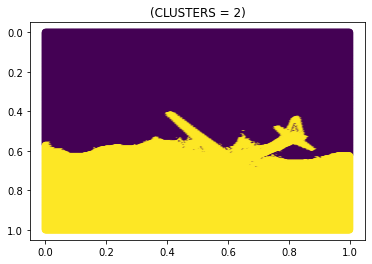

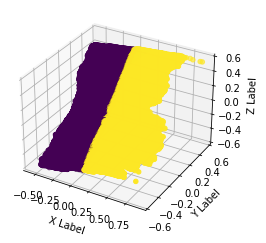

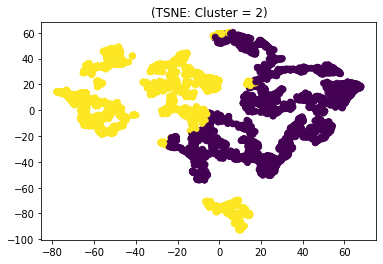

Number of Plane Clusters :  3


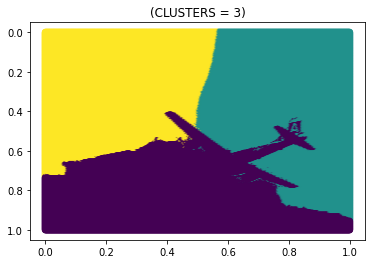

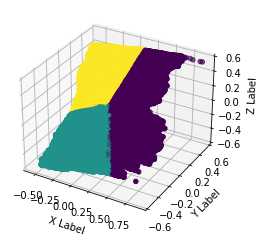

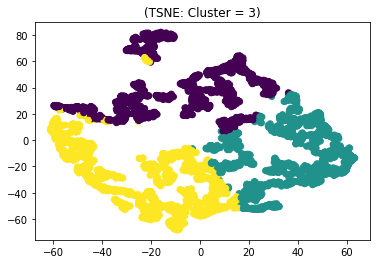

Number of Plane Clusters :  4


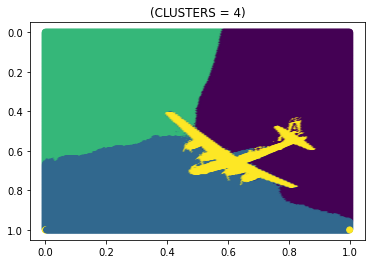

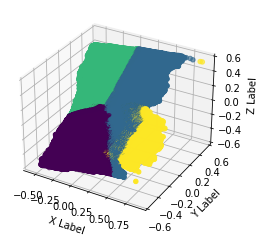

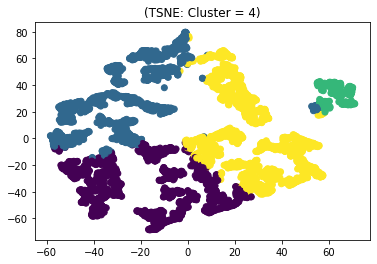

Number of Plane Clusters :  5


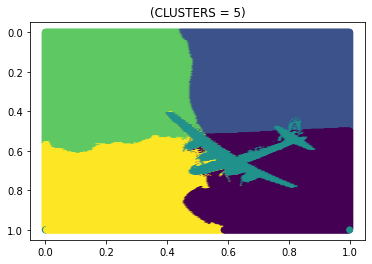

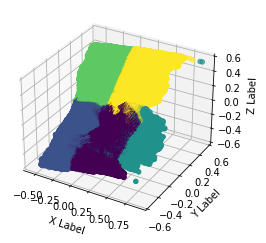

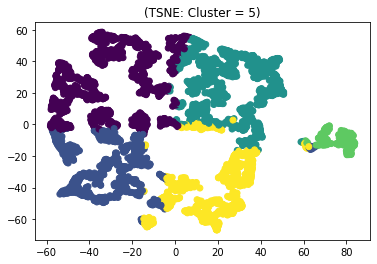

In [140]:
# For plane image
for i in range(2,6):
    print('Number of Plane Clusters : ',i)
    segmentation_gmm(dfMatrixPlane,i)

Bird Image 

Number of Plane Clusters :  2


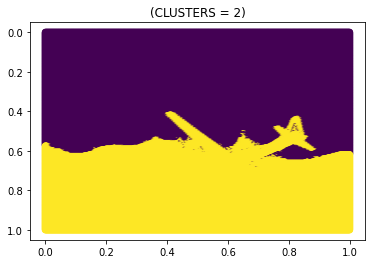

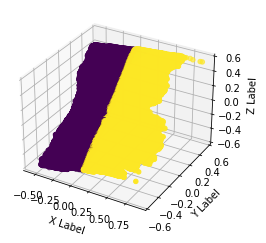

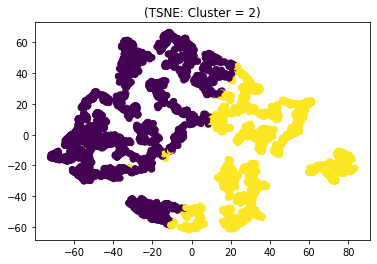

Bird Image 

Number of Plane Clusters :  3


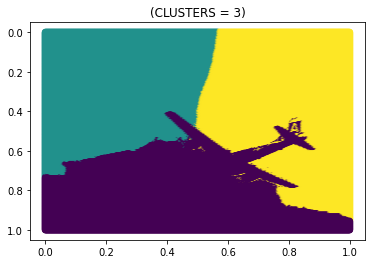

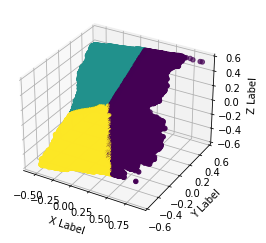

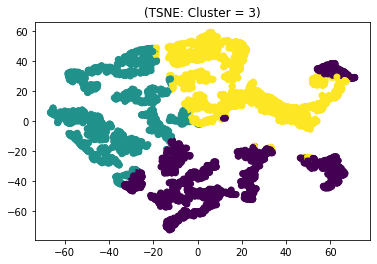

Bird Image 

Number of Plane Clusters :  4


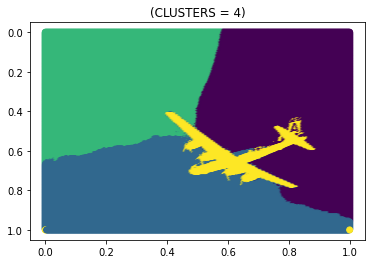

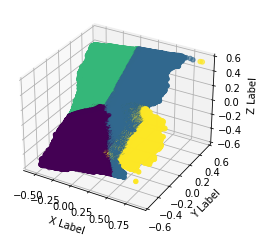

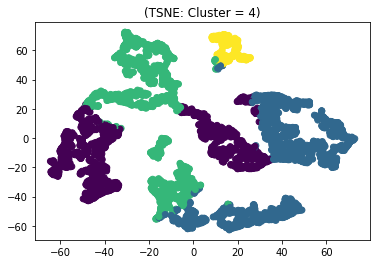

Bird Image 

Number of Plane Clusters :  5


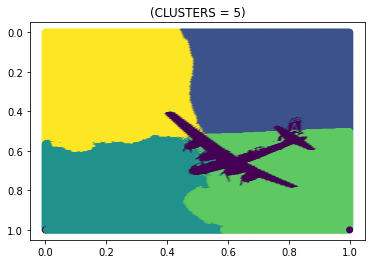

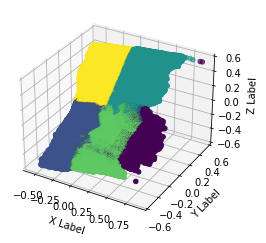

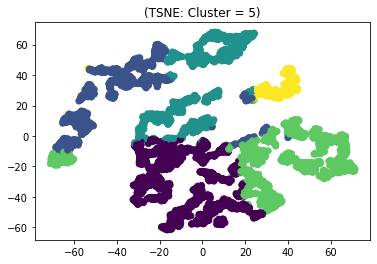

In [141]:
# For bird image
for i in range(2,6):
    print('Bird Image \n')
    print('Number of Plane Clusters : ',i)
    segmentation_gmm(dfMatrixPlane,i)

# Heirarchical Clustering using Single Linkage

In [152]:
def score_agglom_func(agg_data, kmax):
    silh = []
    cv = []
    for k in range(2,kmax+1):
        cluster = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'single')
        labels = cluster.fit_predict(agg_data)
        silh.append(silhouette_score(agg_data, labels, metric='euclidean'))
        cv.append(calinski_harabasz_score(agg_data, labels))
    return silh, cv

In [153]:
silhouette_plane, ch_plane = score_agglom_func(dfMatrixPlane.sample(3000),5)

In [154]:
silhouette_bird, ch_bird = score_agglom_func(dfMatrixBird.sample(3000),5)

In [155]:
silhouette_plane

[0.11606539330383782,
 0.19240811192938242,
 0.025664317648452745,
 -0.16894824607968903]

In [156]:
ch_plane

[1.3974405253596733, 373.8767884157924, 249.72598271624412, 187.30892097736285]

In [157]:
silhouette_bird

[-0.12689080325659322,
 -0.20939528636582674,
 -0.23411536042548073,
 -0.2480576808667801]

In [158]:
ch_bird

[0.3648244173929772, 0.5916742057311078, 0.9121655343397295, 1.829099182390409]

Silhouette analysis is used to measure the separation distance between the resulting clusters. Higher the separation distance between the clusters, better is the clustering.
According to Silhouette score, 5 is the optimal number of clusters for the plane image.

Calinski_harabasz_score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. The score is higher when clusters are dense and well separated.According to Calinski-Harabasz score, 5 is the optimal number of cluters for the plane image.

In [161]:
def segmentation_heirarchical(data,n_cluster):
    # Applying the heirarchical clustering 
    data = data.sample(3500)
    cluster = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'single')
    labels = cluster.fit_predict(data)
    plt.scatter(data.iloc[:,1],data.iloc[:,0],c=labels) 
    plt.gca().invert_yaxis()
    plt.title('(CLUSTERS = {})'.format(n_cluster))
    plt.show()
    # Applying PCA on the dataset
    pca = PCA(n_components = 3)
    pc_features = pca.fit_transform(data)
    pca_fit= pd.DataFrame(data= {'pc1': pc_features[:,0],'pc2':pc_features[:,1],'pc3':pc_features[:,1]})
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_fit['pc1'], pca_fit['pc2'], pca_fit['pc3'],c = labels, marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    # TSNE STARTS HERE
    model = TSNE(n_components = 2,random_state = 0, perplexity=35.0) 
    t_data = model.fit_transform(data)
    df=pd.DataFrame()
    df['tsne1'] = t_data[:,0]
    df['tsne2'] = t_data[:,1] 
    plt.scatter(df['tsne1'],df['tsne2'],c=labels)
    plt.title('(TSNE: Cluster = {})'.format(n_cluster))
    plt.show()

Number of Plane Clusters :  2


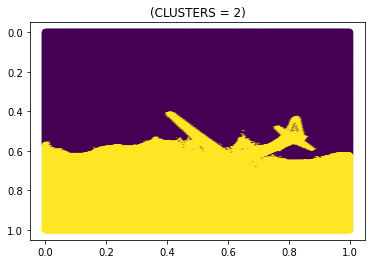

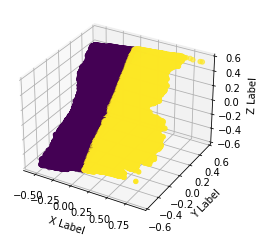

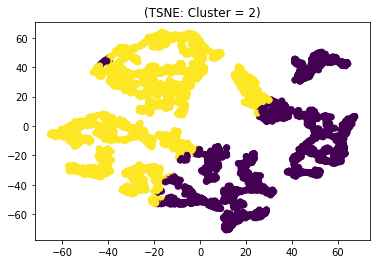

Number of Plane Clusters :  3


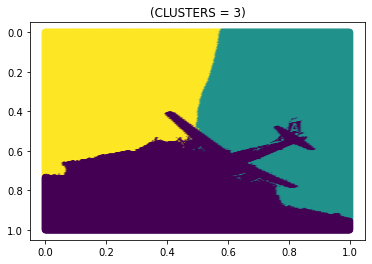

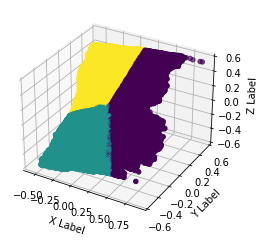

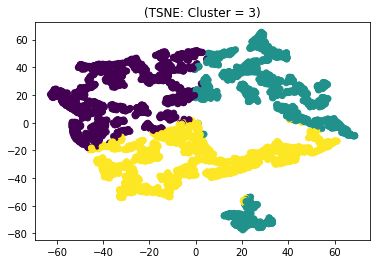

Number of Plane Clusters :  4


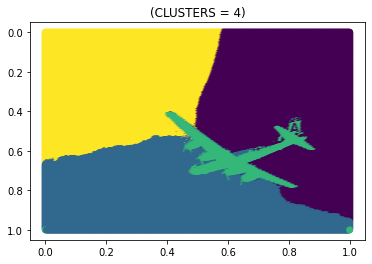

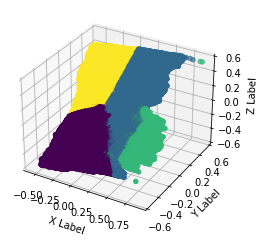

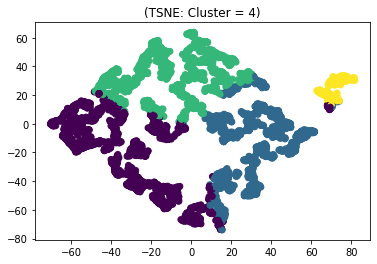

Number of Plane Clusters :  5


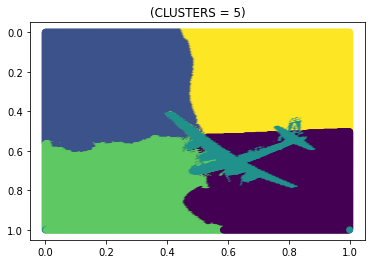

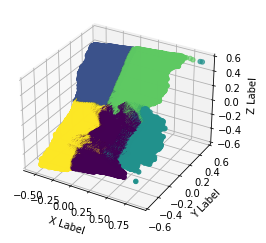

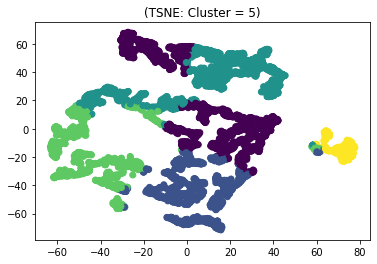

In [162]:
# For plane image
for i in range(2,6):
    print('Number of Plane Clusters : ',i)
    segmentation_heirarchical(dfMatrixPlane,i)

Number of Plane Clusters :  2


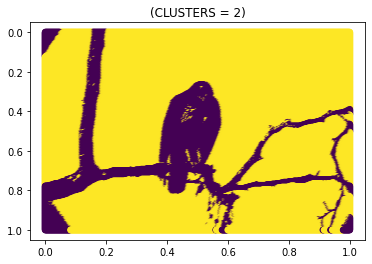

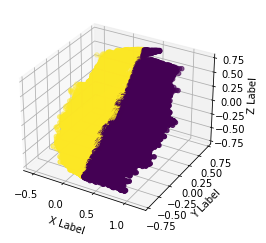

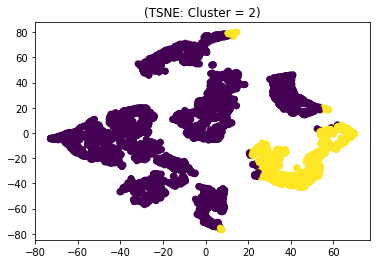

Number of Plane Clusters :  3


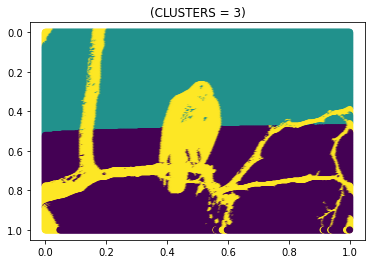

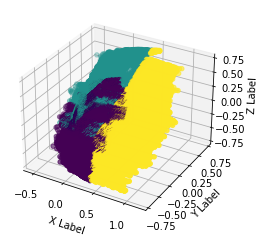

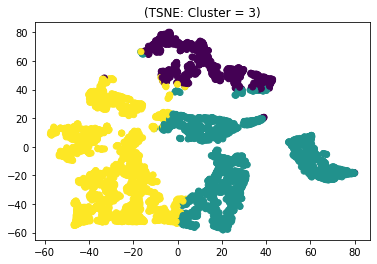

Number of Plane Clusters :  4


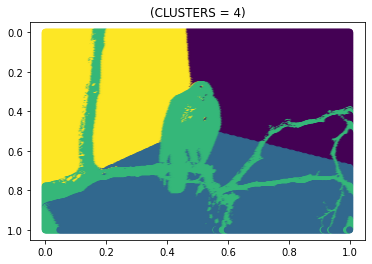

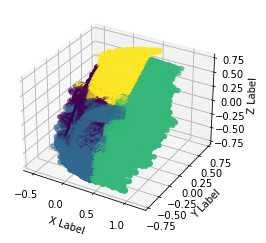

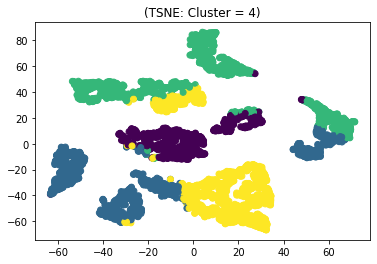

Number of Plane Clusters :  5


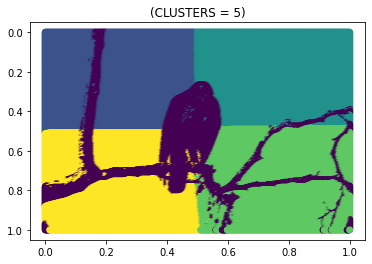

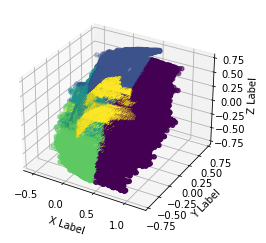

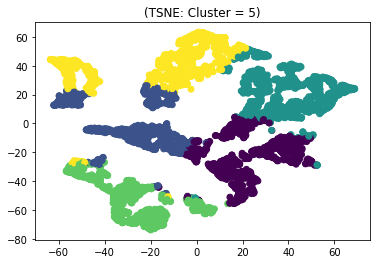

In [163]:
# For bird image
for i in range(2,6):
    print('Number of Plane Clusters : ',i)
    segmentation_heirarchical(dfMatrixBird,i)